In [1]:
import pandas as pd
url= "https://raw.githubusercontent.com/cior666/Machine-Learning-III-Entrega/refs/heads/main/Data%20discovery/spotify_reviews_clean.csv"
df=pd.read_csv(url)
df.head()

,Review,Rating,sentiment
0,"Great music service, the audio is high quality...",5,1
1,Please ignore previous negative rating. This a...,5,1
2,"This pop-up ""Get the best Spotify experience o...",4,1
3,Really buggy and terrible to use as of recently,1,0
4,Dear Spotify why do I get songs that I didn't ...,1,0


In [2]:
df.info()
df['sentiment'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54708 entries, 0 to 54707
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     54708 non-null  object
 1   Rating     54708 non-null  int64 
 2   sentiment  54708 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


sentiment
1    29937
0    24771
Name: count, dtype: int64

In [ ]:
#exploramos la informacion de las review
df['review_length'] = df['Review'].str.len()
df['review_length'].describe()

count    54708.000000
mean       159.480515
std        119.055963
min         10.000000
25%         70.000000
50%        125.000000
75%        215.000000
max       3753.000000
Name: review_length, dtype: float64

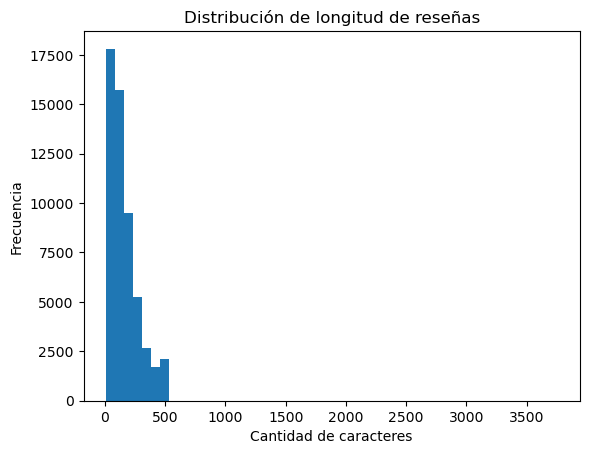

In [ ]:
#planteamos una visualizacion de la distribucion en la longitud de reseñas
import matplotlib.pyplot as plt
plt.hist(df['review_length'], bins=50)
plt.title("Distribución de longitud de reseñas")
plt.xlabel("Cantidad de caracteres")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
#Podemos ver que la mayoría de las reseñas son cortas, esto es esperable al pensarlo como comentarios sobre apps moviles.

In [ ]:
#ahora procedemos a agrupar las reviews por longitud y sentimiento
df.groupby('sentiment')['review_length'].mean()
#de aquí podemos concluir que las reseñas negativas suelen ser más largas que las positivas,
#nos estamos basando en la información arrojada en el EDA.

sentiment
0    201.276937
1    124.896583
Name: review_length, dtype: float64

In [ ]:
#vamos a ver las palabras más frecuentes, para ello planteamos una pequeña limpieza
import string
def limpieza_simple(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text
df['clean_text'] = df['Review'].apply(limpieza_simple)

In [10]:
#ahora contamos las palabras para tener una idea del ruido, detectar stopwords entre otros
from collections import Counter
all_words = " ".join(df['clean_text']).split()
word_freq = Counter(all_words)
word_freq.most_common(20)

[('the', 61501),
 ('i', 59713),
 ('to', 57882),
 ('and', 42146),
 ('it', 38699),
 ('app', 31374),
 ('a', 28259),
 ('is', 25689),
 ('music', 23044),
 ('my', 20744),
 ('for', 20071),
 ('of', 19018),
 ('this', 18621),
 ('you', 17815),
 ('spotify', 16803),
 ('but', 16477),
 ('songs', 15345),
 ('have', 13773),
 ('that', 13433),
 ('on', 13339)]

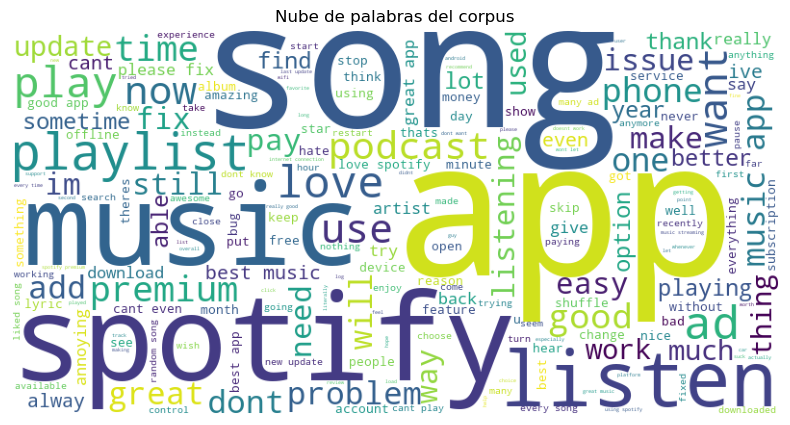

In [11]:
#planteamos ahora una nube de palabras general
from wordcloud import WordCloud

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate(" ".join(df['clean_text']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Nube de palabras del corpus")
plt.show()


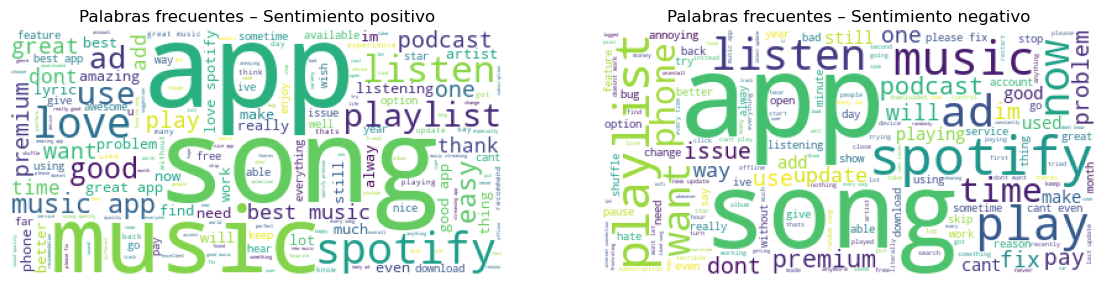

In [12]:
#ahora plantearemos nubes de palabras por sentimiento, para poder realizar conclusiones y analisis futuros, además siento
#que le aporta valor al proyecto de manera que permite asociar palabras con sentimientos visualmente hablando.
positive_text = " ".join(df[df['sentiment'] == 1]['clean_text'])
negative_text = " ".join(df[df['sentiment'] == 0]['clean_text'])
wc_pos = WordCloud(background_color="white").generate(positive_text)
wc_neg = WordCloud(background_color="white").generate(negative_text)
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.imshow(wc_pos)
plt.axis("off")
plt.title("Palabras frecuentes – Sentimiento positivo")
plt.subplot(1,2,2)
plt.imshow(wc_neg)
plt.axis("off")
plt.title("Palabras frecuentes – Sentimiento negativo")

plt.show()


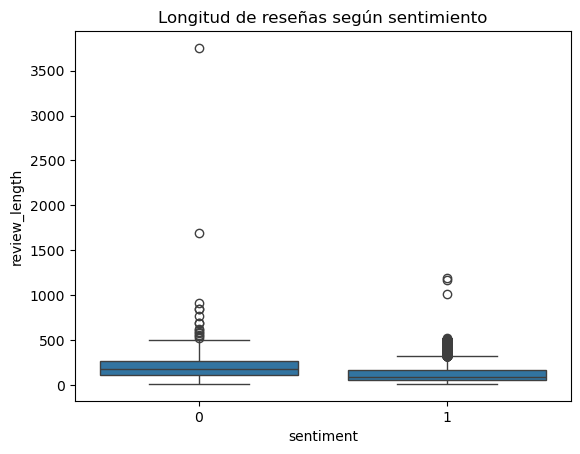

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(
    x='sentiment',
    y='review_length',
    data=df
)
plt.title("Longitud de reseñas según sentimiento")
plt.show()


In [ ]:
#Con estas gráficas y análisis realizados, podemos decir que el EDA nos muestra diferencias claras de longitud y vocabulario entre
#las reseñas según el sentimiento, lo que nos da pie a utilizar las diferentes técnicas de vectorización para poder capturar
#patrones relevantes para la clasificación de las mismas.